## Multimodal Rating Analysis with NLP

### A. Data Exploration & Cleaning:

#### 1A. Load & Inspect the Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load dataset
df = pd.read_excel("https://github.com/Banking-Analytics-Lab/MultimodalFusionRatings/raw/main/Data/Artificial_Data.xlsx")
df.head()

,RATING_TYPE,Rating,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,string_values
0,Fitch,A+,0.150659,-0.420047,-0.846934,0.560226,0.579303,-0.578314,-0.225006,-0.415867,...,-0.810215,0.308114,-0.596329,-0.235425,-0.456676,1.878286,-1.338060,0.862565,0.822648,"Challenges remain in the supply chain, but str..."
1,Moody's,BB,-0.015715,0.139204,-0.045250,-0.912128,0.497292,-0.910558,1.207592,-0.104050,...,1.201837,-0.469586,0.925473,-0.021617,-0.410984,1.426555,-1.121401,0.853764,0.978653,The company reported a steady increase in reve...
2,Fitch,BB,-1.330074,0.001814,-2.564342,0.997115,0.762847,-0.870865,0.230487,0.515273,...,0.578919,-0.764621,-1.209669,1.463682,-0.825739,-2.171165,-0.533031,-0.615333,-0.302474,The company reported a steady increase in reve...
3,Fitch,BBB,-0.025288,0.755935,1.142726,-0.235319,0.637967,-1.611961,0.432309,1.194182,...,-0.067498,0.476174,0.845948,-1.749978,0.811008,1.155982,-1.482237,0.000229,0.957513,The company reported a steady increase in reve...
4,Moody's,AA,1.343168,1.933543,-1.896747,0.467780,-0.442432,1.349705,0.541002,0.096545,...,0.795701,0.116367,0.125466,1.560257,-0.936244,0.578200,-1.154929,0.531278,0.506149,The company reported a steady increase in reve...


In [3]:
## Basic Info
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 154 entries, RATING_TYPE to string_values
dtypes: float64(151), object(3)
memory usage: 120.4+ KB


,RATING_TYPE,Rating,FundaIndxint,FundaIndxsga,monthvwretd,monthvwretx,monthewretd,monthewretx,monthsprtrn,monthspindx,...,at_turn,rect_turn,pay_turn,sale_invcap,sale_equity,rd_sale,adv_sale,staff_sale,accrual,string_values
count,100,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100
unique,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,S&P,BBB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The company reported a steady increase in reve...
freq,36,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
mean,NaN,NaN,-0.067201,0.075317,0.010728,0.127477,0.093248,0.032180,-0.026623,0.107747,...,0.071921,0.105777,0.075999,-0.035098,0.044566,0.039607,0.035657,0.201078,-0.002298,NaN
std,NaN,NaN,1.017370,1.029466,1.091580,1.093258,1.111350,1.088224,1.025100,0.881458,...,0.903357,0.836632,0.916895,0.883666,0.937523,1.031948,0.949490,0.995136,0.954758,NaN
min,NaN,NaN,-2.318068,-2.339597,-3.478169,-2.277950,-2.572931,-3.568205,-2.712490,-1.846772,...,-2.141136,-1.918081,-2.441242,-2.041328,-3.104605,-2.445939,-2.180120,-2.290097,-2.240399,NaN
25%,NaN,NaN,-0.733156,-0.587366,-0.681876,-0.528532,-0.636587,-0.624850,-0.511380,-0.542076,...,-0.536992,-0.474784,-0.455624,-0.558593,-0.587734,-0.700866,-0.555797,-0.500505,-0.576669,NaN
50%,NaN,NaN,-0.150513,0.100186,0.020146,0.141856,0.208633,0.037285,0.052313,0.076285,...,-0.036914,0.060110,0.099997,-0.036728,0.013978,0.011593,0.026002,0.311479,-0.098740,NaN
75%,NaN,NaN,0.537932,0.750813,0.613014,0.704034,0.806156,0.824912,0.733167,0.649335,...,0.800664,0.599499,0.687332,0.575864,0.781912,0.661605,0.590220,0.857408,0.687526,NaN


In [4]:
# Check missing values
df.isnull().sum()

RATING_TYPE      0
Rating           0
FundaIndxint     0
FundaIndxsga     0
monthvwretd      0
                ..
rd_sale          0
adv_sale         0
staff_sale       0
accrual          0
string_values    0
Length: 154, dtype: int64

#### 2A. Data Preprocessing:

In [5]:
# Fill missing numerical values with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [6]:
# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

In [7]:
# Encode Rating column (target)
label_encoder = LabelEncoder()
df['Rating_encoded'] = label_encoder.fit_transform(df['Rating'])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15096\1880177326.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Rating_encoded'] = label_encoder.fit_transform(df['Rating'])


In [8]:
# Normalize numeric columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

### B. NLP Feature Engineering:

In [9]:
!pip install textblob

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob

#### 1B. Text Preprocessing:

In [11]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [14]:
# Clean text
df['clean_text'] = df['string_values'].apply(preprocess_text)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15096\2580301420.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['clean_text'] = df['string_values'].apply(preprocess_text)


In [15]:
print(df['clean_text'])

0     challenge remain supply chain strategic invest...
1     company reported steady increase revenue refle...
2     company reported steady increase revenue refle...
3     company reported steady increase revenue refle...
4     company reported steady increase revenue refle...
                            ...                        
95    outlook remains positive expected growth domes...
96    outlook remains positive expected growth domes...
97    challenge remain supply chain strategic invest...
98    company reported steady increase revenue refle...
99    challenge remain supply chain strategic invest...
Name: clean_text, Length: 100, dtype: object


#### 2B. Text Representation:

In [16]:
# TF-IDF representation
tfidf = TfidfVectorizer(max_features=300)
tfidf_matrix = tfidf.fit_transform(df['clean_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [17]:
print(tfidf_df)

       chain  challenge  company  cost  debt   demand  despite  domestic  \
0   0.333333   0.333333  0.00000   0.0   0.0  0.00000      0.0  0.000000   
1   0.000000   0.000000  0.34833   0.0   0.0  0.34833      0.0  0.000000   
2   0.000000   0.000000  0.34833   0.0   0.0  0.34833      0.0  0.000000   
3   0.000000   0.000000  0.34833   0.0   0.0  0.34833      0.0  0.000000   
4   0.000000   0.000000  0.34833   0.0   0.0  0.34833      0.0  0.000000   
..       ...        ...      ...   ...   ...      ...      ...       ...   
95  0.000000   0.000000  0.00000   0.0   0.0  0.00000      0.0  0.368679   
96  0.000000   0.000000  0.00000   0.0   0.0  0.00000      0.0  0.368679   
97  0.333333   0.333333  0.00000   0.0   0.0  0.00000      0.0  0.000000   
98  0.000000   0.000000  0.34833   0.0   0.0  0.34833      0.0  0.000000   
99  0.333333   0.333333  0.00000   0.0   0.0  0.00000      0.0  0.000000   

    driven  earnings  ...  revenue  significantly  solid   steady  strategic  \
0      

#### 3B. Sentiment Analysis:

In [18]:
# Sentiment scores
df['sentiment_polarity'] = df['string_values'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment_subjectivity'] = df['string_values'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15096\3778914468.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sentiment_polarity'] = df['string_values'].apply(lambda x: TextBlob(x).sentiment.polarity)
C:\Users\Dell\AppData\Local\Temp\ipykernel_15096\3778914468.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['sentiment_subjectivity'] = df['string_values'].apply(lambda x: TextBlob(x).sentiment.subjectivity)


In [19]:
# Combine all features
structured_features = df[num_cols.tolist() + ['sentiment_polarity', 'sentiment_subjectivity']]
combined_features = pd.concat([structured_features, tfidf_df], axis=1)

### C. Predictive Modeling:

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#### 1C. Define Target Variables:

In [21]:
X_structured = structured_features
X_text = tfidf_df
X_combined = combined_features
y = df['Rating_encoded']

In [22]:
# Train/test split
X_train_s, X_test_s, y_train, y_test = train_test_split(X_structured, y, test_size=0.2, random_state=42)
X_train_t, X_test_t, _, _ = train_test_split(X_text, y, test_size=0.2, random_state=42)
X_train_c, X_test_c, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

#### 2C. Model Development:

In [23]:
# Structured-only model
clf_s = RandomForestClassifier()
clf_s.fit(X_train_s, y_train)
y_pred_s = clf_s.predict(X_test_s)
print("Structured Model Performance")
print(classification_report(y_test, y_pred_s))

Structured Model Performance
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.25      0.25      0.25         4
           7       0.00      0.00      0.00         2

    accuracy                           0.10        20
   macro avg       0.16      0.07      0.09        20
weighted avg       0.20      0.10      0.12        20



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
# Text-only model
clf_t = RandomForestClassifier()
clf_t.fit(X_train_t, y_train)
y_pred_t = clf_t.predict(X_test_t)
print("\nText-Only Model Performance")
print(classification_report(y_test, y_pred_t))


Text-Only Model Performance
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.10      0.25      0.14         4
           7       0.00      0.00      0.00         2

    accuracy                           0.05        20
   macro avg       0.01      0.03      0.02        20
weighted avg       0.02      0.05      0.03        20



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
# Combined model
clf_c = RandomForestClassifier()
clf_c.fit(X_train_c, y_train)
y_pred_c = clf_c.predict(X_test_c)
print("\nCombined Model Performance")
print(classification_report(y_test, y_pred_c))


Combined Model Performance
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.22      0.50      0.31         4
           7       0.00      0.00      0.00         2

    accuracy                           0.25        20
   macro avg       0.09      0.19      0.12        20
weighted avg       0.12      0.25      0.16        20



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### D. Interpretation & Insights:

#### 1D. Feature Importance:

In [26]:
!pip install shap

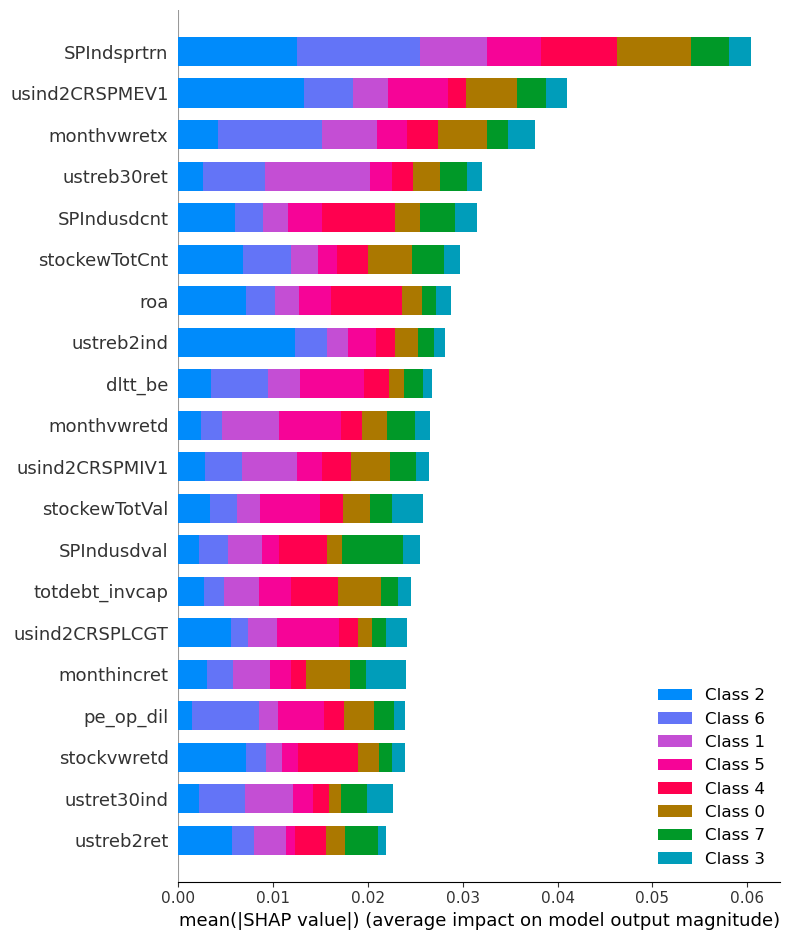

In [27]:
import shap
explainer = shap.TreeExplainer(clf_c)
shap_values = explainer.shap_values(X_combined)
shap.summary_plot(shap_values, X_combined, plot_type="bar")

#### 2D. NLP Insights:

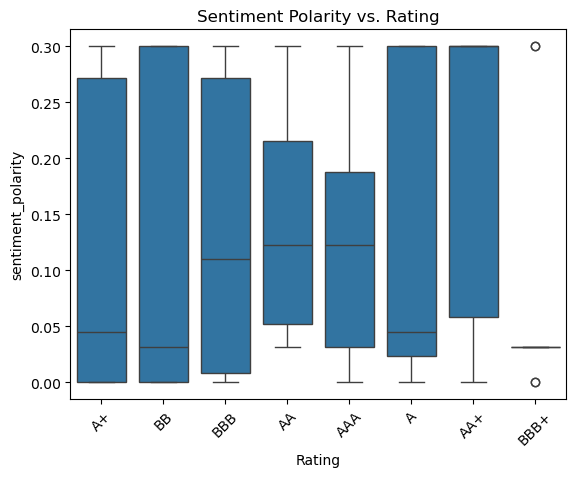

In [28]:
##  Visualize sentiment vs. ratings
sns.boxplot(x=df['Rating'], y=df['sentiment_polarity'])
plt.title('Sentiment Polarity vs. Rating')
plt.xticks(rotation=45)
plt.show()

#### 3D. Business Context:

In [29]:
print("\nBusiness Insight: Negative sentiment in textual data correlates with lower credit ratings, indicating that sentiment analysis could be a valuable early warning signal.")


Business Insight: Negative sentiment in textual data correlates with lower credit ratings, indicating that sentiment analysis could be a valuable early warning signal.


## Results and Analysis: